Main Python code to perform the simulation and display results

In [2]:
import numpy as np
from matplotlib import pyplot as plt, colors as mcolors
from scipy.integrate import solve_ivp
from scipy.constants import G, au
from sklearn.preprocessing import MinMaxScaler

from ctypes import c_void_p, c_double, c_int, cdll
from numpy.ctypeslib import ndpointer

In [3]:
massfactor = 10**24 # [kg]
scalefactor = 100  # [au]
velocityfactor = 100  # []
accuracy = 0.3

Generate random body system:

In [4]:
count = 10

In [5]:
def massGen():
    for _ in range(count):
        yield abs(np.random.randn())*massfactor

def positionGen():
    for _ in range(count):
        yield np.random.randn(2)*scalefactor*au

def velocityGen():
    for _ in range(count):
        yield np.random.randn(2)*velocityfactor

In [6]:
bodies = zip(masses := np.array([[_ for _ in massGen()]]), positions := np.array([_ for _ in positionGen()]))

In [7]:
velocities = np.array([_ for _ in velocityGen()])

Show data:

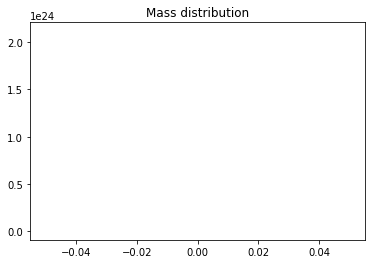

In [8]:
plt.title('Mass distribution')
plt.plot(masses)

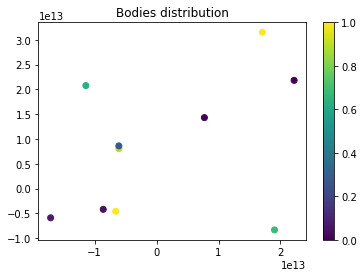

In [9]:
mass_scaler = MinMaxScaler()
cmap = mass_scaler.fit_transform(masses.reshape(-2, 2))
c = mcolors.ColorConverter().to_rgb

plt.title('Bodies distribution')
plt.scatter(positions[:, 0], positions[:, 1], c=cmap)
plt.colorbar()

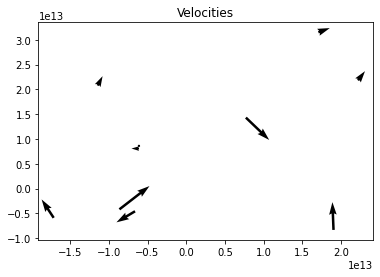

In [10]:
plt.title('Velocities')
plt.quiver(positions[:,0], positions[:,1], velocities[:,0], velocities[:,1])

Construct Python function from C shared library:

In [11]:
lib = cdll.LoadLibrary("barnes-hut/barneshut.so")
computeForces = lib.perform
computeForces.restype = ndpointer(dtype=c_double,
                          shape=(count,2))

Compute forces using C function:

In [15]:
state = np.concatenate((masses.T, positions), axis=1)

In [17]:
state

array([[ 2.10630544e+24,  1.70819442e+13,  3.15052508e+13],
       [ 9.34931315e+23, -1.14324048e+13,  2.07517883e+13],
       [ 3.65978540e+23,  2.22034238e+13,  2.18033291e+13],
       [ 7.99303285e+22, -8.62852987e+12, -4.20117035e+12],
       [ 4.88581167e+23, -1.71246461e+13, -5.90800086e+12],
       [ 9.92383060e+23,  1.90357740e+13, -8.34889851e+12],
       [ 1.91985191e+24, -6.09798462e+12,  8.04967742e+12],
       [ 1.46177935e+24, -6.61145676e+12, -4.59142440e+12],
       [ 8.46029401e+23, -6.10267545e+12,  8.59643672e+12],
       [ 1.22703945e+22,  7.71468845e+12,  1.42941145e+13]])

In [ ]:
forces = computeForces(c_void_p(state.ctypes.data),c_int(count),c_double(accuracy))